In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , f1_score

In [2]:
#loading the dataset
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\diabetes.csv')

In [3]:
#viewing the dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()
#It tells that there are no null values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#viewing the statistical information
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
 #The min value for "Glucose , BloodPressure , SkinThickness and BMI" is 0 which is not logic value for such features so we should deal with it , by Replacing the 0 value with null.
df.loc[:,'Glucose'].replace(0 , np.NaN , inplace=True)
df.loc[:,'BloodPressure'].replace(0 , np.NaN , inplace=True)
df.loc[:,'SkinThickness'].replace(0 , np.NaN , inplace=True)
df.loc[:,'BMI'].replace(0 , np.NaN , inplace=True)    

In [8]:
#viewing the statistical information
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,768.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,115.244002,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
5,5,116.0,74.0,NaN,0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88,31.0,0.248,26,1
7,10,115.0,NaN,NaN,0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543,30.5,0.158,53,1
9,8,125.0,96.0,NaN,0,NaN,0.232,54,1


In [10]:
#checking the null values again
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

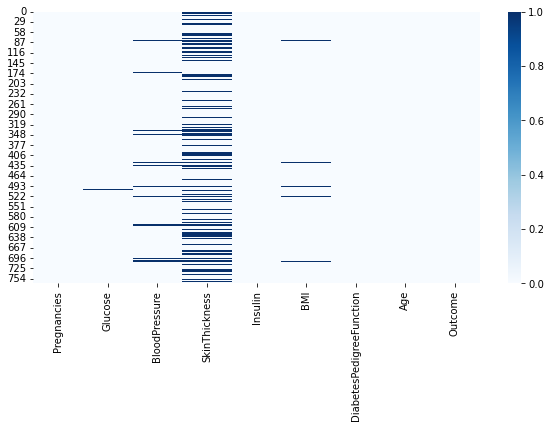

In [11]:
#viewing the heatmap for the null values
plt.figure(figsize=(10,5))
sns.heatmap(df.isna() , cmap='Blues')
plt.show()

In [12]:
#dealing with the null values: replacing the null values with the mean value
df.loc[:,'Glucose'].fillna(df.loc[:,'Glucose'].mean(),inplace=True)
df.loc[:,'BloodPressure'].fillna(df.loc[:,'BloodPressure'].mean(),inplace=True)
df.loc[:,'SkinThickness'].fillna(df.loc[:,'SkinThickness'].mean(),inplace=True)
df.loc[:,'BMI'].fillna(df.loc[:,'BMI'].mean(),inplace=True)

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,0,30.1,0.349,47,1


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

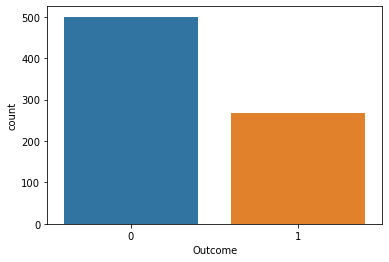

In [17]:
sns.countplot(data = df , x='Outcome')

In [18]:
#this tells that our dataset has more non-diabetic patients than diabetic.

In [19]:
#dividing the dataset into x(input) and y(output) features
x = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [20]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [21]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [22]:
#preprocessing the dataset
X_scaler = StandardScaler().fit_transform(x)

In [23]:
#splitting the dataset into testing and training part
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
#viewing the dataset shape
x_train.shape

(614, 8)

In [25]:
y_train.shape

(614,)

In [26]:
x_test.shape

(154, 8)

In [27]:
y_test.shape

(154,)

In [28]:
#training our model using KNN
knn = KNeighborsClassifier(n_neighbors=10).fit(x_train , y_train)
knn.score(x_train , y_train)*100

78.0130293159609

In [29]:
#predicting the output values from x_testing data part
y_pred = knn.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [30]:
#viewing the y_testing(output) datapart
y_test 

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [31]:
#difference between the actual and predicted output values
y_test - y_pred

array([ 0, -1,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  0,  0, -1,  1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,
        0,  1,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  1, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0, -1,  0,  1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0], dtype=int64)

In [32]:
#checking the accuracy score
print(accuracy_score(y_true=y_test , y_pred=y_pred)*100)

74.02597402597402


In [33]:
#Note our data set is imbalnce , so the best performance evaluation is f1_score
target_name = []
classification_report(y_true=y_test , y_pred=y_pred,output_dict=True)

{'0': {'precision': 0.7981651376146789,
  'recall': 0.8285714285714286,
  'f1-score': 0.8130841121495327,
  'support': 105},
 '1': {'precision': 0.6,
  'recall': 0.5510204081632653,
  'f1-score': 0.5744680851063829,
  'support': 49},
 'accuracy': 0.7402597402597403,
 'macro avg': {'precision': 0.6990825688073394,
  'recall': 0.689795918367347,
  'f1-score': 0.6937760986279577,
  'support': 154},
 'weighted avg': {'precision': 0.7351125938281902,
  'recall': 0.7402597402597403,
  'f1-score': 0.7371608308176214,
  'support': 154}}

In [35]:
#Hence, this model gives the above accuracy score